# ------------------------- The Spark Foundation ----------------------------

# GRIP(Data Science & Business Analytics)

## Author : Aftab Aziz Shaikh

### EXPLORAORY DATA ANALYSIS

Now, We perform Exploratory Data Analysis on IPL Dataset

Here, We try to find Which team give best and which teams are not perform well.

**Step 1 : Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')
sns.set()

#### Step 2 : Loading and Reading the Data

In [2]:
matches_df = pd.read_csv("matches.csv")
delivery_df = pd.read_csv("deliveries.csv")

In [3]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches_df.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [6]:
delivery_df.tail(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [7]:
matches_df.size

13608

In [8]:
delivery_df.size

3760638

In [9]:
matches_df.shape

(756, 18)

In [10]:
delivery_df.shape

(179078, 21)

#### Step 3 : Picking Relevant Data

In [11]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [12]:
match_data =  matches_df [['id','season','city','date','team1','team2','toss_winner','toss_decision','result','winner',
                           'win_by_wickets','win_by_runs','player_of_match','venue','umpire1']]

In [13]:
delivery_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [14]:
delivery_data = delivery_df [['match_id','batting_team','bowling_team','over','ball','batsman','bowler','is_super_over','wide_runs',
                              'noball_runs','batsman_runs','total_runs','player_dismissed','dismissal_kind','fielder']]

In [15]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_wickets,win_by_runs,player_of_match,venue,umpire1
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,0,35,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,7,0,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,10,0,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,6,0,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,0,15,KM Jadhav,M Chinnaswamy Stadium,NaN


In [16]:
delivery_data.head()

,match_id,batting_team,bowling_team,over,ball,batsman,bowler,is_super_over,wide_runs,noball_runs,batsman_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,0,0,0,4,4,NaN,NaN,NaN
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,0,2,0,0,2,NaN,NaN,NaN


#### Step 4 :Checking Duplicate data 

In [17]:
match_data.duplicated().sum()

0

In [18]:
delivery_data.duplicated().sum()

23

In delivery data there are 23 dupicate values

In [19]:
delivery_data.drop_duplicates()

,match_id,batting_team,bowling_team,over,ball,batsman,bowler,is_super_over,wide_runs,noball_runs,batsman_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,0,0,0,4,4,NaN,NaN,NaN
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,0,2,0,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SL Malinga,0,0,0,1,1,NaN,NaN,NaN
179074,11415,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,SL Malinga,0,0,0,2,2,NaN,NaN,NaN
179075,11415,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,SL Malinga,0,0,0,1,1,SR Watson,run out,KH Pandya
179076,11415,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,SL Malinga,0,0,0,2,2,NaN,NaN,NaN


#### Step 5 : Data Visualization

In [20]:
match_data.sample(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_wickets,win_by_runs,player_of_match,venue,umpire1
373,374,2012,Dharamsala,2012-05-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,Delhi Daredevils,6,0,UT Yadav,Himachal Pradesh Cricket Association Stadium,BF Bowden


In [21]:
match_data['season'] = pd.DatetimeIndex(match_data['date']).year

In [22]:
match_per_season = match_data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.style.background_gradient(cmap='PuBu')

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


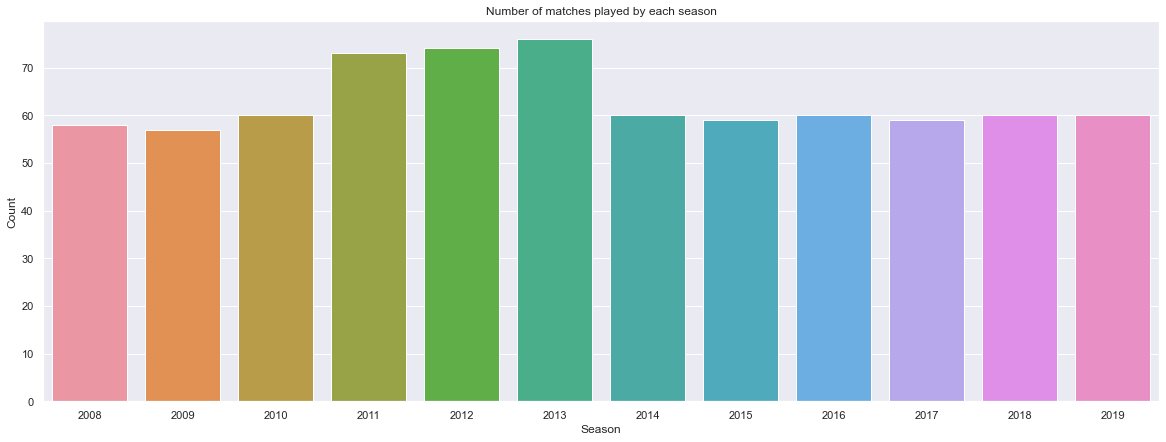

In [23]:
plt.figure(figsize = (20,7))
sns.barplot(x = match_per_season.season, y = match_per_season.matches, data = match_data)
plt.title("Number of matches played by each season")
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

**Insights:**

1. We see, In 2013 more matches are played in single season. 
2. 2011 and 2012 season are not long in the from the 2013.
3. In 2018 and 2019 60 matches are played. They are on the same place.

In [24]:
match_per_city = match_data.groupby(['city'])['id'].count().reset_index().rename(columns={'id':'matches'})

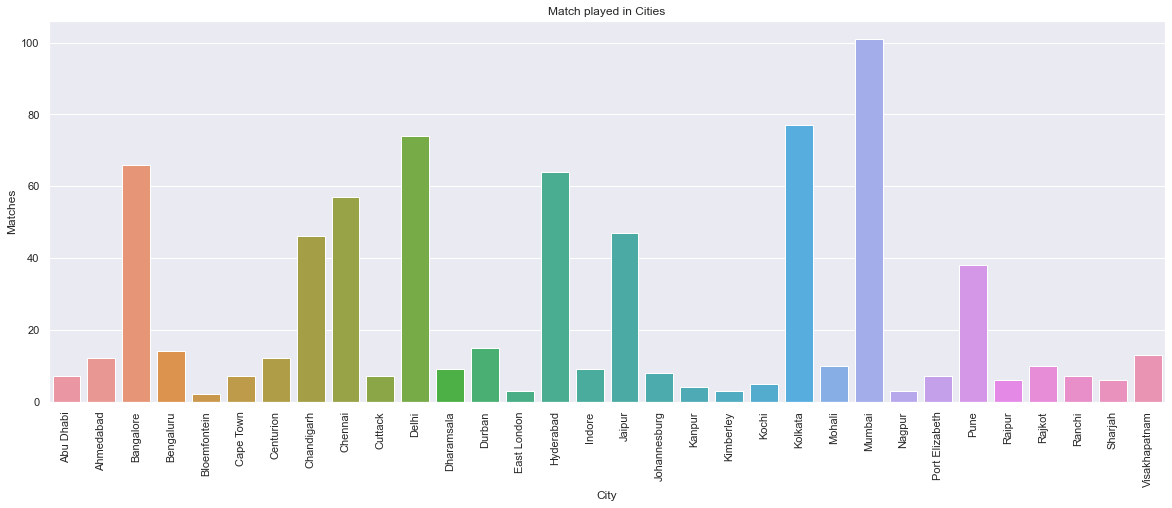

In [25]:
plt.figure(figsize = (20,7))
sns.barplot(x = match_per_city.city, y = match_per_city.matches, data = match_data)
plt.title('Match played in Cities')
plt.xlabel('City')
plt.ylabel('Matches')
plt.xticks(rotation = 90)
sns.set_style('whitegrid')
plt.show()

**Insights**

1. In India , Mumbai is the city were ,most of the matches are played.
2. In forien country, Durban is the city were most of matches are played.

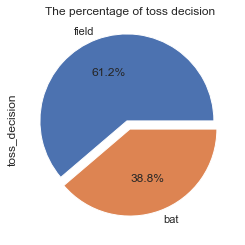

In [26]:
match_data_copy = match_data.copy()
match_data_copy['toss_decision'] = match_data['toss_decision'].replace({1:'feild', 0:'bat'})
match_data_copy['toss_decision'].value_counts().plot(kind='pie', explode = [0.1,0], autopct = '%1.1f%%')
plt.title('The percentage of toss decision')
plt.show()

**Insights**

1. 61.2% time most of the team are select fielding.
2. Remaining 38.8% time teams select batting first.

In [27]:
match_data['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

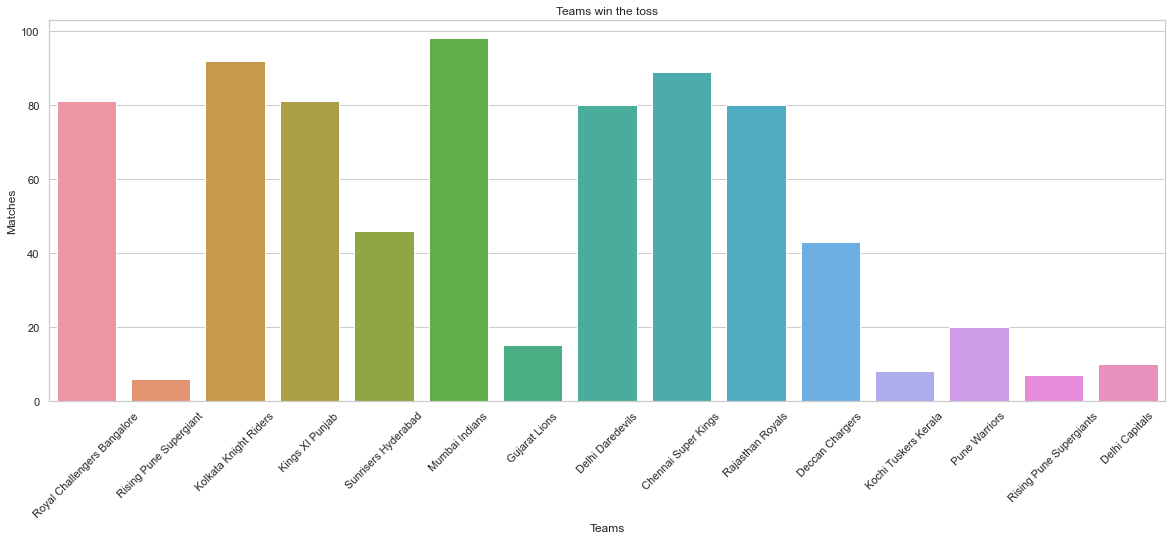

In [28]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'toss_winner',  data = match_data)
plt.title('Teams win the toss')
plt.xlabel('Teams')
plt.ylabel('Matches')
plt.xticks(rotation = 45)
plt.show()

**Insights**

1. Mumbai Indians is the team who win toss most time.
2. Raising Pune Supergiants is the team who win less tosses.

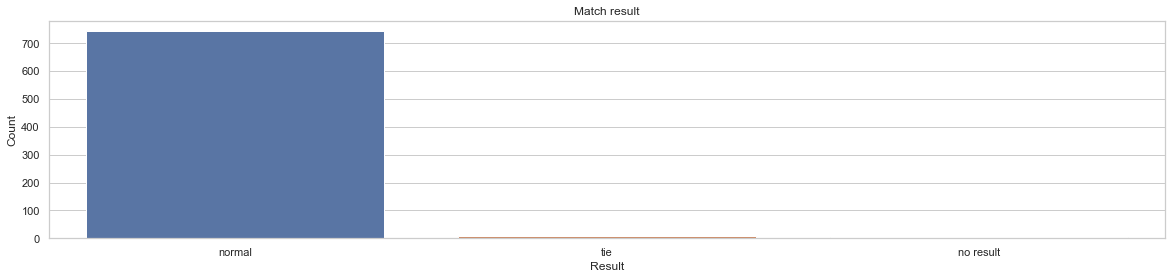

In [29]:
plt.figure(figsize = (20,4))
sns.countplot(x = 'result', data = match_data)
plt.title('Match result')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

**Insights**

1. In the graph, we most of the matches have normal results.
2. There is not a single match were results are not come.
3. Some match have a results of tie.

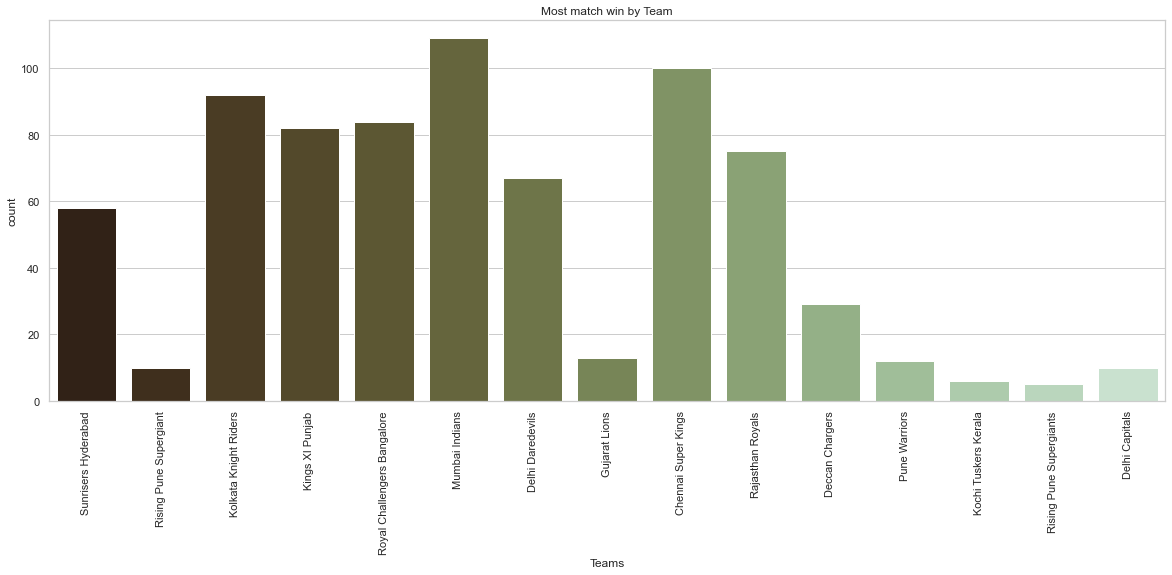

In [30]:
plt.figure(figsize = (20,7))
sns.countplot('winner', data = match_data, palette = 'ch:52_r')
plt.title('Most match win by Team')
plt.xlabel('Teams')
plt.xticks(rotation = 90)
plt.show()

**Insights**

1. We clearly see Mumbai Indians is the team who win most matches.
2. Chennai Super Kings following them by 2nd rank.
3. Kochi Tuskers Kerala & Rising Pune Supergaints both the team win less matches.

In [31]:
match_per_season = match_data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})

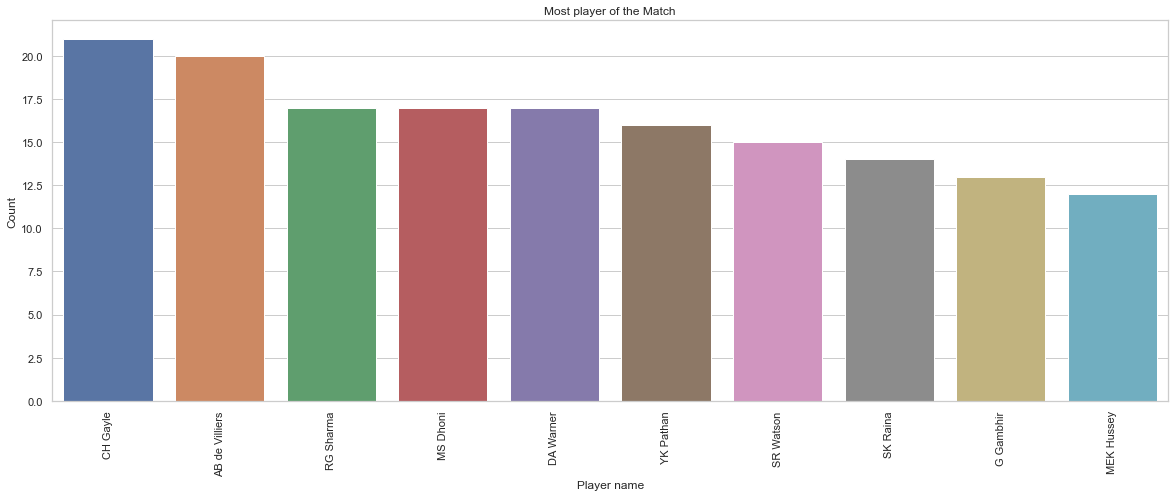

In [32]:
plt.figure(figsize = (20,7))
sns.barplot(match_data['player_of_match'].value_counts()[:10].index, match_data['player_of_match'].value_counts()[:10].values)
plt.title('Most player of the Match')
plt.xlabel('Player name')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

**Insights**

1. CH Gayle is the player who win more player of the match & also In foreiner players he got more player of the match.
2. In Indian Player we have a tie in RG Sharma & MS Dhoni they win same player of the match title.

In [33]:
temp_df = match_data.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


*In this above table we see Mumbai Indians is the who win more title. They become 4 time champions in all odd years.Chennai Super kings are following. Rajastan Royals is the team who become 1st ever champions in IPL.*

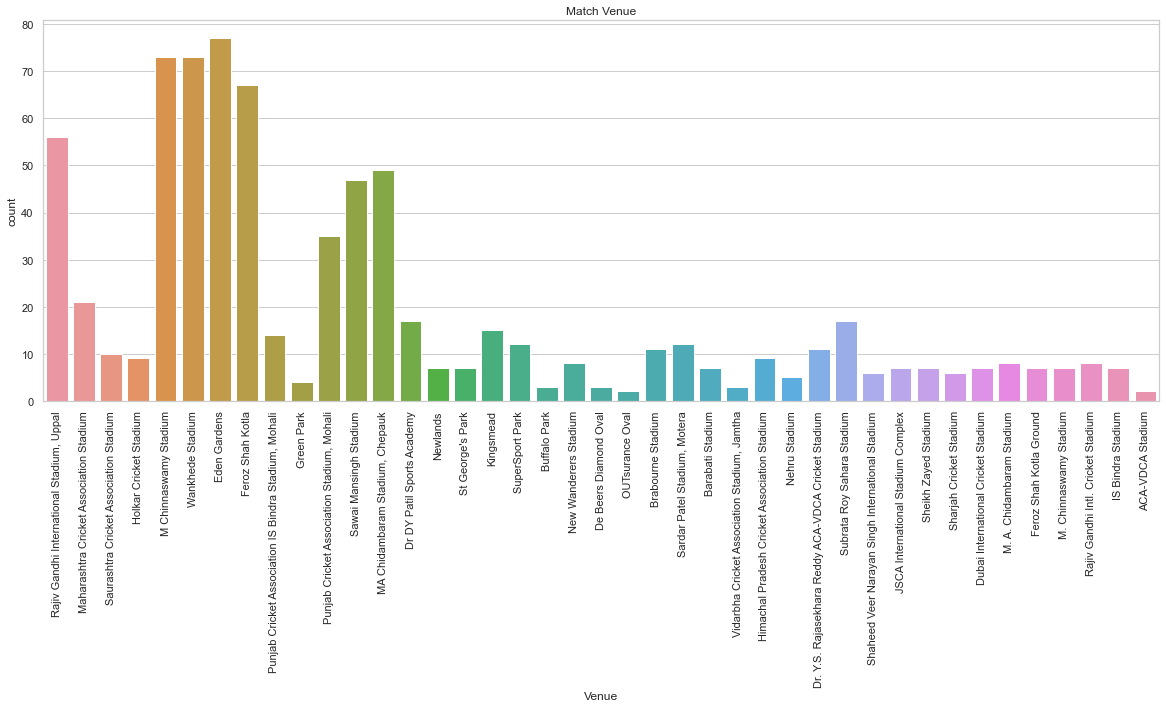

In [34]:
plt.figure(figsize = (20,7))
sns.countplot('venue', data = match_data)
plt.title('Match Venue')
plt.xlabel('Venue')
plt.xticks(rotation = 90)
plt.show()

**Insights**

1. In venue, most matches are played in the Eden Gardens.
2. Chinnaswamy & Wankhede Stadium have same place in venues count.
3. In forein Stadium Kingsmead is the stadium where most matches played.

In [35]:
delivery_data.sample(1)

,match_id,batting_team,bowling_team,over,ball,batsman,bowler,is_super_over,wide_runs,noball_runs,batsman_runs,total_runs,player_dismissed,dismissal_kind,fielder
45035,191,Mumbai Indians,Kolkata Knight Riders,13,6,SS Tiwary,CH Gayle,0,0,0,4,4,NaN,NaN,NaN


**Particular Player Analysis**

In [36]:
filt=(delivery_data['batsman']=='V Kohli')
df_kohli=delivery_data[filt]
df_kohli.head()

,match_id,batting_team,bowling_team,over,ball,batsman,bowler,is_super_over,wide_runs,noball_runs,batsman_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,TG Southee,0,1,0,0,1,NaN,NaN,NaN
2591,12,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,TG Southee,0,0,0,1,1,NaN,NaN,NaN
2593,12,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,TG Southee,0,0,0,0,0,NaN,NaN,NaN
2594,12,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,TG Southee,0,0,0,1,1,NaN,NaN,NaN
2597,12,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,Harbhajan Singh,0,0,0,0,0,NaN,NaN,NaN


In [37]:
len(df_kohli[df_kohli['batsman_runs']==4])

482

In [38]:
len(df_kohli[df_kohli['batsman_runs']==6])

191

In [39]:
df_kohli['total_runs'].sum()

5616

In [40]:
def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

print("Runs scored from 1's :",count(df_kohli,1))
print("Runs scored from 2's :",count(df_kohli,2))
print("Runs scored from 3's :",count(df_kohli,3))
print("Runs scored from 4's :",count(df_kohli,4))
print("Runs scored from 6's :",count(df_kohli,6))

Runs scored from 1's : 1741
Runs scored from 2's : 586
Runs scored from 3's : 33
Runs scored from 4's : 1928
Runs scored from 6's : 1146


In [41]:
filt = (delivery_data['batsman']== 'DA Warner')
df_warner = delivery_data[filt]
df_warner.head()

,match_id,batting_team,bowling_team,over,ball,batsman,bowler,is_super_over,wide_runs,noball_runs,batsman_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,0,0,0,4,4,NaN,NaN,NaN
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,0,0,NaN,NaN,NaN
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,0,2,0,0,2,NaN,NaN,NaN


In [42]:
len(df_warner[df_warner['batsman_runs']==4])

459

In [43]:
len(df_warner[df_warner['batsman_runs']==6])

181

In [44]:
df_warner['total_runs'].sum()

4975

In [45]:
def count(df_warner,runs):
    return len(df_warner[df_warner['batsman_runs']==runs])*runs

print("Runs scored from 1's :",count(df_warner,1))
print("Runs scored from 2's :",count(df_warner,2))
print("Runs scored from 3's :",count(df_warner,3))
print("Runs scored from 4's :",count(df_warner,4))
print("Runs scored from 6's :",count(df_warner,6))

Runs scored from 1's : 1213
Runs scored from 2's : 542
Runs scored from 3's : 54
Runs scored from 4's : 1836
Runs scored from 6's : 1086


We found that V Kohli & DA warner not have much difference. There overall performance is same. Virat Kohli have more runs than DA warner

### Batsman Analysis

In [46]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

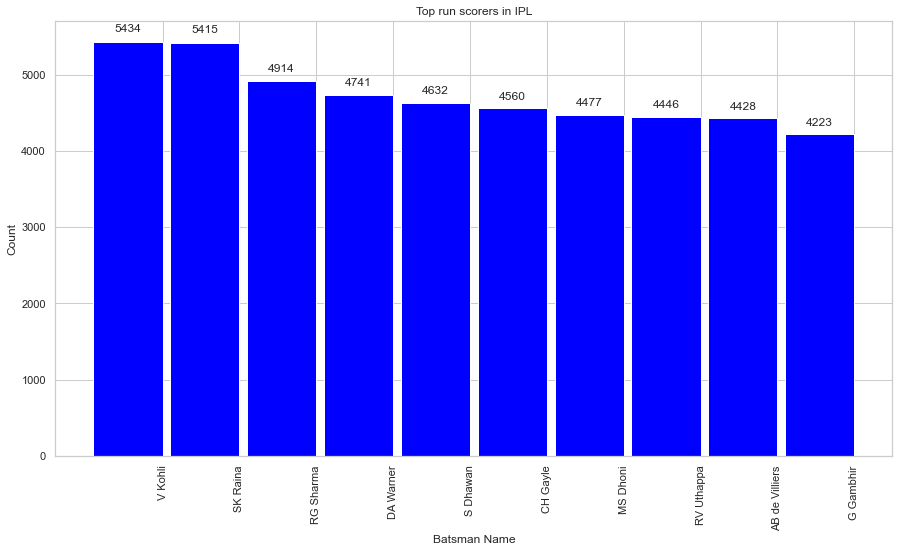

In [47]:
temp_df = delivery_data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsman Name')
autolabel(rects)
plt.show()

**Insights**

1. Virat kohli is leading the chart by following SK Raina. 
2. In above charts all players have more 4000 runs.
3. In foreinr DA Warner is highest run scorer.

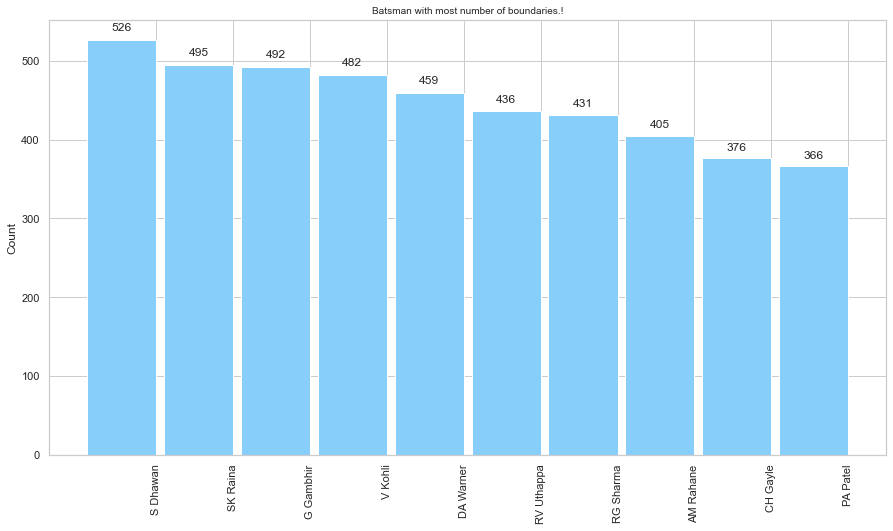

In [48]:
temp_df = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
autolabel(rects)
plt.show()

**Insights**

1. S Dhawan played more boundaries inthe IPL.
2. SK Raina following him & G Gambir & SK Raina not habe so much difference.

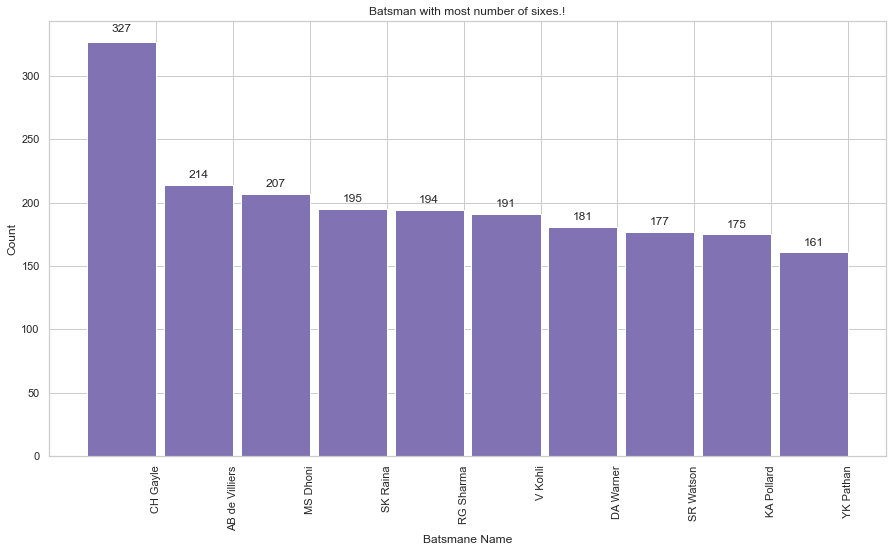

In [49]:
temp_df = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()


**Insights**

1. CH Gayle hit more sixes in IPL & He also the foreiner hit more sixes in IPL.
2. MS Dhoni is the 3rd player who hit more sixes in IPL & 1st Indian PLayer who hit more sixes in IPL.

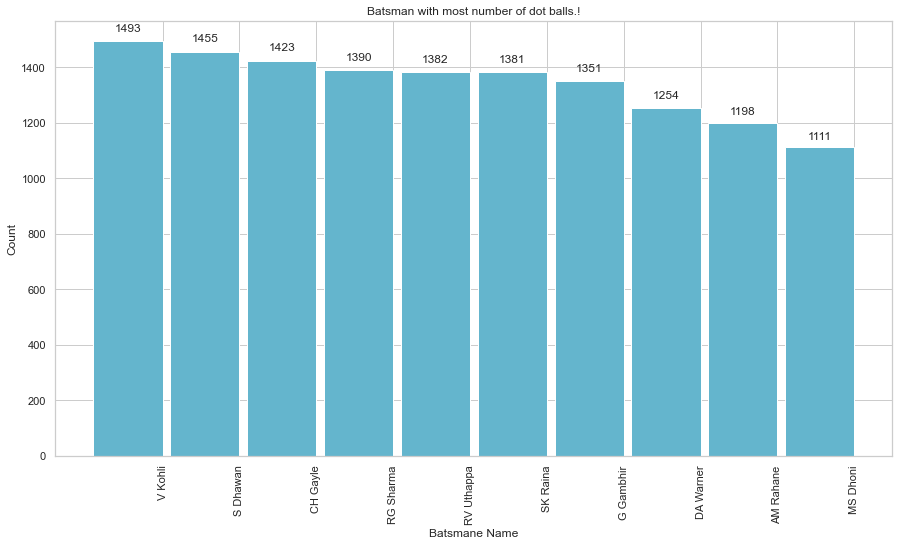

In [50]:
temp_df = delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

**Insights**

1. V kohli played more dot balls in the all season of ipl.
2. Gayle also played more dot balls & he is 1 st foriener player.
3. We see most of the player are playing in top order.

# Bowler Analysis

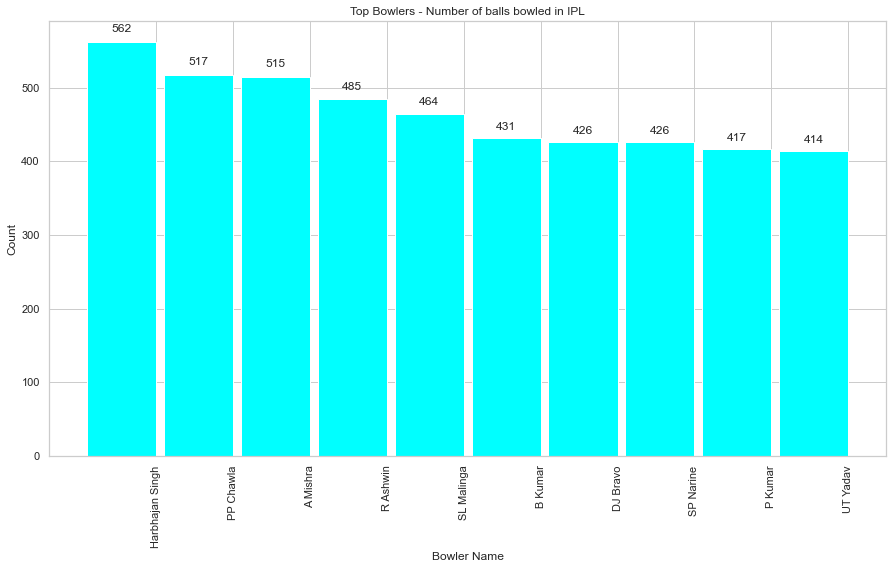

In [51]:
temp_df = delivery_data.groupby('bowler')['ball'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Name')
autolabel(rects)
plt.show()


**Insights**

1. Harbhajan Singh is the bowler who bowl 562 bowls in the IPL.
2. DJ Bravo and SP Narine are on the place. They both bowl 426 bowls. They also came from same nation.

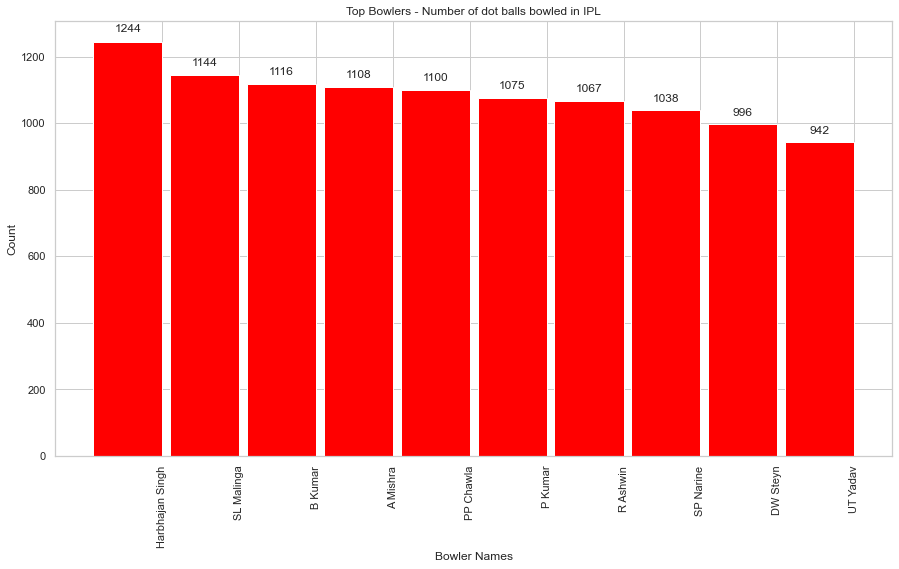

In [52]:
temp_df = delivery_data.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

**Insights**

1. Harbhanjan singh is the bowler who take 1244 wickets in the ipl. He is only player who take more thann 1200 wickets.
2. SL Malinga is th 2nd player who take more wickets and 1st forein player.
3. There 8 players who take more than 1000 wickets.

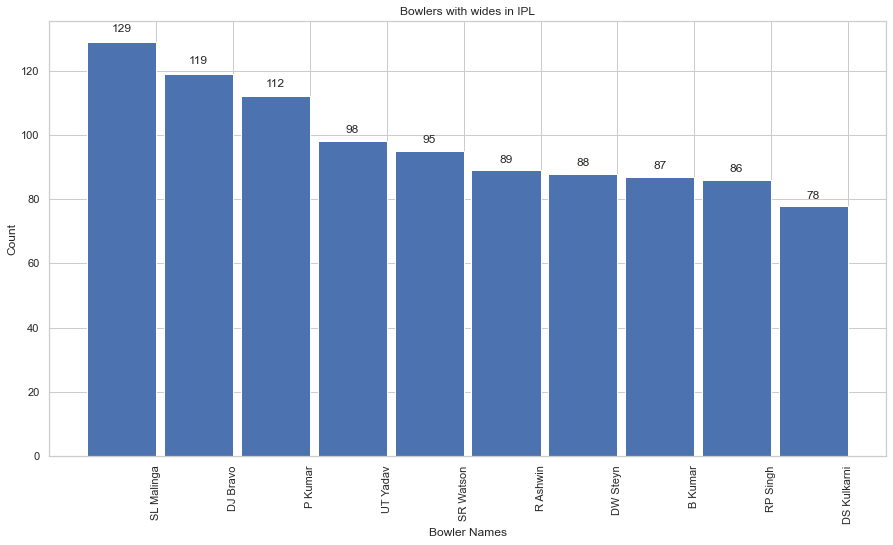

In [53]:
temp_df = delivery_data.groupby('bowler')['wide_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='wide_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['wide_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with wides in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

**Insights**

1. SL Malinga is the bowler who bowl more wide balls in the IPL.
2. P Kumar Indian bowler who bowl more wide balls.
3. We see that in this more indian bowler bowler who bowl more wide runs.

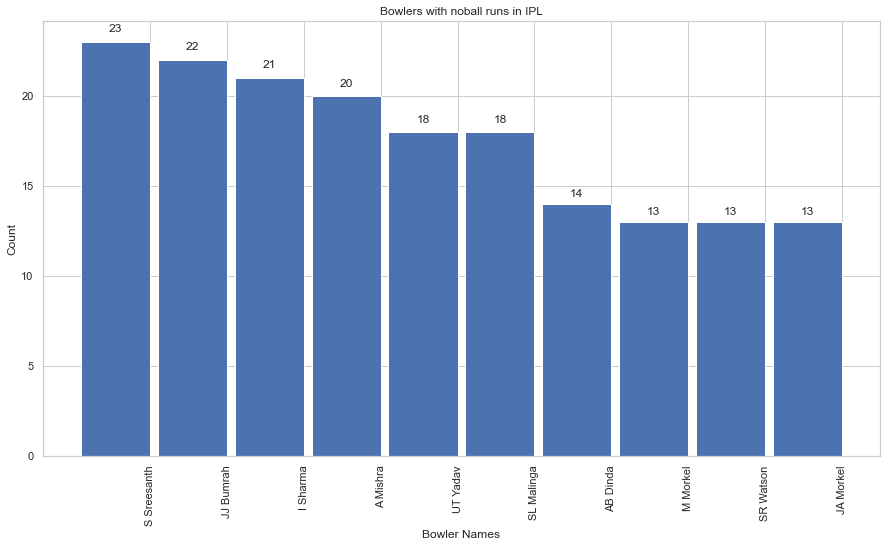

In [54]:
temp_df = delivery_data.groupby('bowler')['noball_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='noball_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['noball_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with noball runs in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

**Insights**

1. S Sreeshanth is the bowler who give more no ball runs in the ipl.
2. M. Morkel, SR Watson and JA Morkel are on the placed with 13.
3. Malinga is the foriner bowler who give more on noball.

In [55]:
high_200=delivery_data.groupby(['match_id','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_200.set_index(['match_id'],inplace=True)

In [56]:
high_200['total_runs'].max()

263

*In Ipl 263 times runs scored more than 200 times*

In [57]:
delivery_data['batting_team'].value_counts()

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

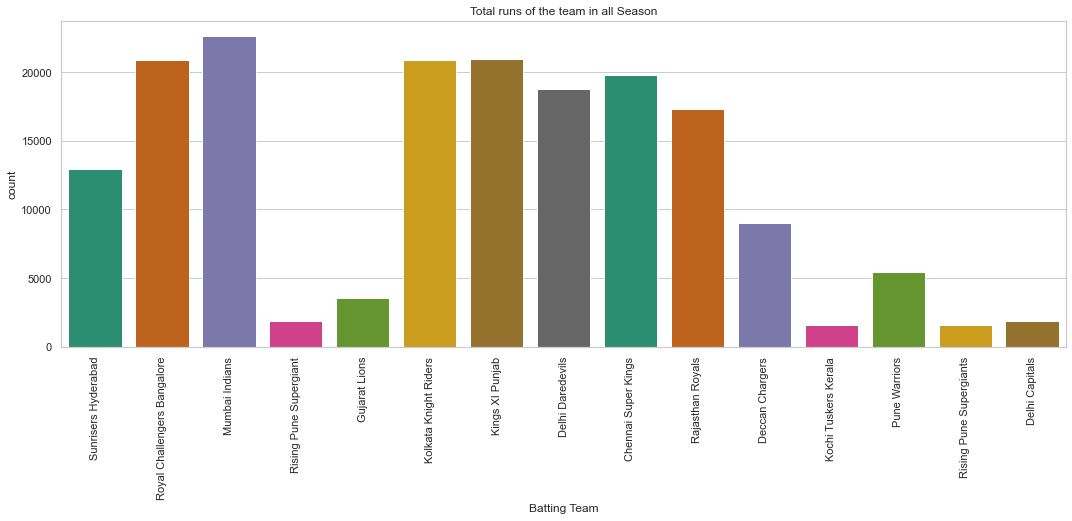

In [58]:
plt.figure(figsize = (18,6))
sns.countplot('batting_team', palette = 'Dark2', data = delivery_data)
plt.xlabel('Batting Team')
plt.title('Total runs of the team in all Season')
plt.xticks(rotation = 90)
plt.show()

**Insights**

1. Mumbai Indians is the team who score more runs in the IPL.
2. RCB, KKR, KXIP are the team are very close to each other in the total runs.
3. Kochi tuskers kerala is the team who score less runs in the IPL

In [59]:
max_win_run_df = match_data[['season','winner','win_by_runs']]
max_win_run_df =  max_win_run_df.sort_values('win_by_runs', ascending = False).head(5)
max_win_run_df.index=np.arange(1,len(max_win_run_df)+1)
max_win_run_df.style.background_gradient()

,season,winner,win_by_runs
1,2017,Mumbai Indians,146
2,2016,Royal Challengers Bangalore,144
3,2008,Kolkata Knight Riders,140
4,2015,Royal Challengers Bangalore,138
5,2013,Royal Challengers Bangalore,130


**Insights**

In [60]:
delivery_dismissal = delivery_data.groupby(['player_dismissed'])['match_id'].count().reset_index().rename(columns={'match_id':'matches'})

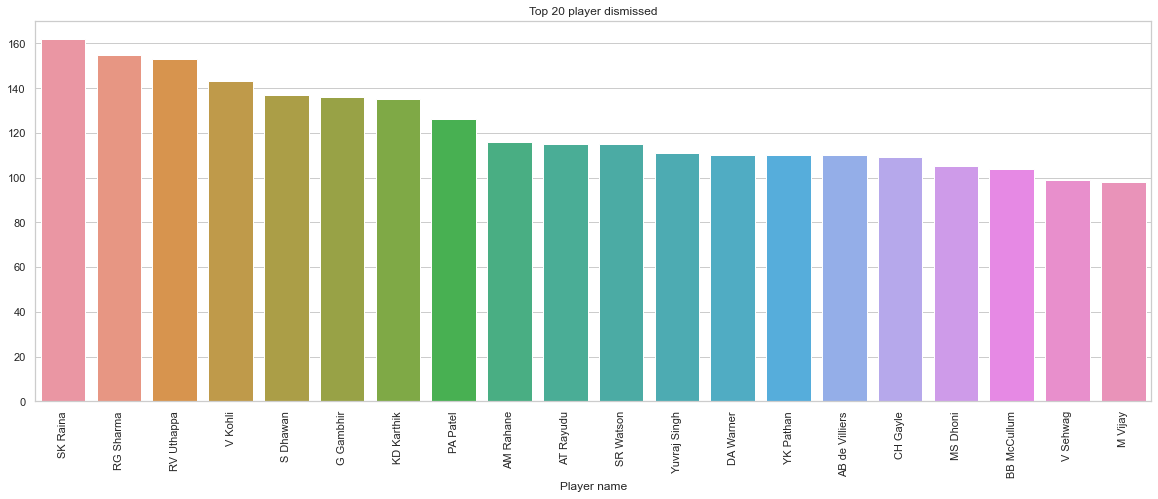

In [61]:
plt.figure(figsize = (20,7))
sns.barplot(delivery_data['player_dismissed'].value_counts()[:20].index, delivery_data['player_dismissed'].value_counts()
            [:20].values)
plt.title('Top 20 player dismissed')
plt.xlabel('Player name')
plt.xticks(rotation = 90)
plt.show()

**Insights**

1. In above graph, We see Suresh Raina is the player who dismessed more than 160 time.
2. In dismmiies WE see that most of the player are playeing Top order. 
3. Yuvraj singh, DA warner, AB de villiers and CH gayle are on the same dismissied.

In [62]:
delivery_dismissal_kind = delivery_data.groupby(['dismissal_kind'])['match_id'].count().reset_index().rename(columns={'match_id':'matches'})

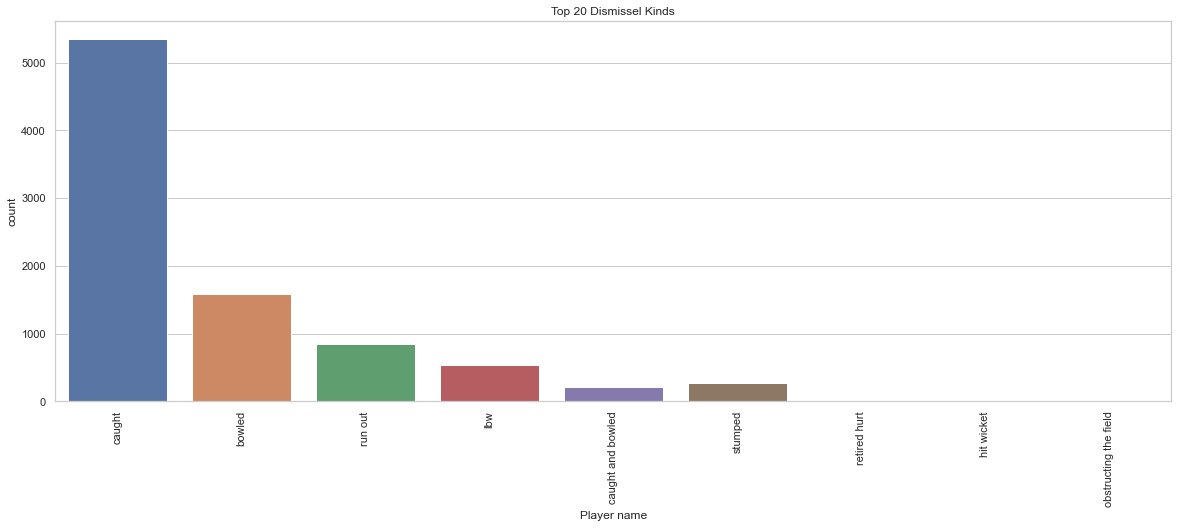

In [63]:
plt.figure(figsize = (20,7))
sns.countplot('dismissal_kind', data = delivery_data, orient = 'r')
plt.title("Top 20 Dismissel Kinds")
plt.xlabel("Player name")
plt.xticks(rotation = 90)
plt.show()

**Insights**

1. In, Dismissal kind found that many people are dismissed by caught. 
2. Bowled and run out as 2nd & 3rd.
3. Not a single player out by retired hurt, hit wikcet and obstructing the feild.
4. Some player are dismissed by both caught and bowled.

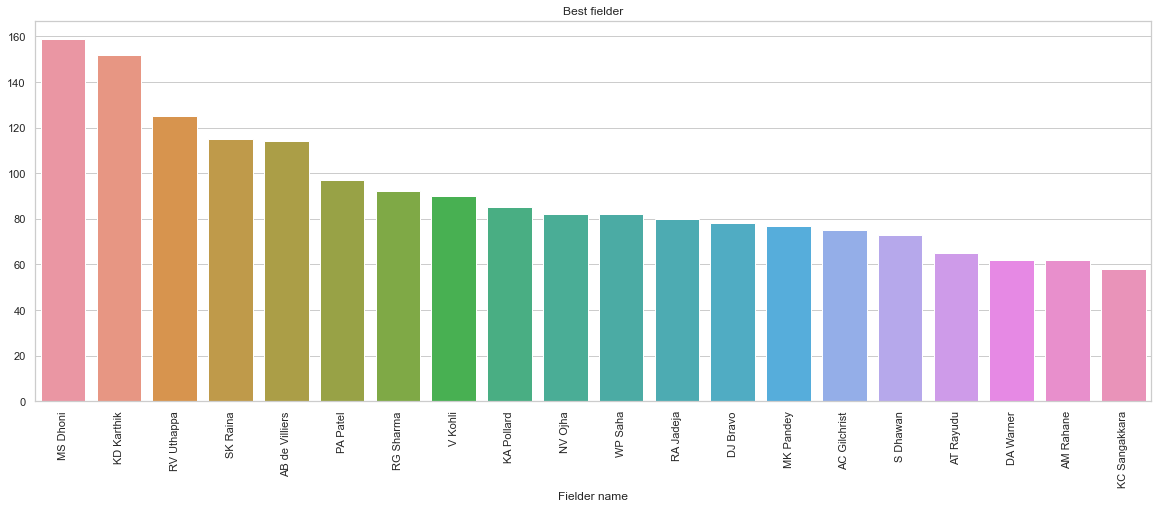

In [64]:
fielder_data = delivery_data.groupby(['fielder'])['match_id'].count().reset_index().rename(columns={'match_id':'matches'})
plt.figure(figsize = (20,7))
sns.barplot(delivery_data['fielder'].value_counts()[:20].index, delivery_data['fielder'].value_counts()[:20].values)
plt.title('Best fielder')
plt.xlabel('Fielder name')
plt.xticks(rotation = 90)
plt.show()

**insights**

1. MS Dhoni is best fielder in the all ipl seasons.
2. KD kartik, RV Uthappa, Develliers, kohli are arranged as their performance

# Conclusion

**In the analysis, we find Mumbai Indiansis the team who win title more titles i.e 4 times.In overall performance Mumbai Indians is the team who give his best performance is all department. Kochi Tuskers Kerala & Raising Pune Giants both team have very low performance. Most of the matches played in 2013.Suresh Raina is the highest run scorer in ipl all season. Ms Dhoni is the best fielder & he is Woicketkeeper. In mumbai most of the matches are played. In 2017, most runs are scored. Chris Gayle win more player of the match title**  

# Thank You! For reading this